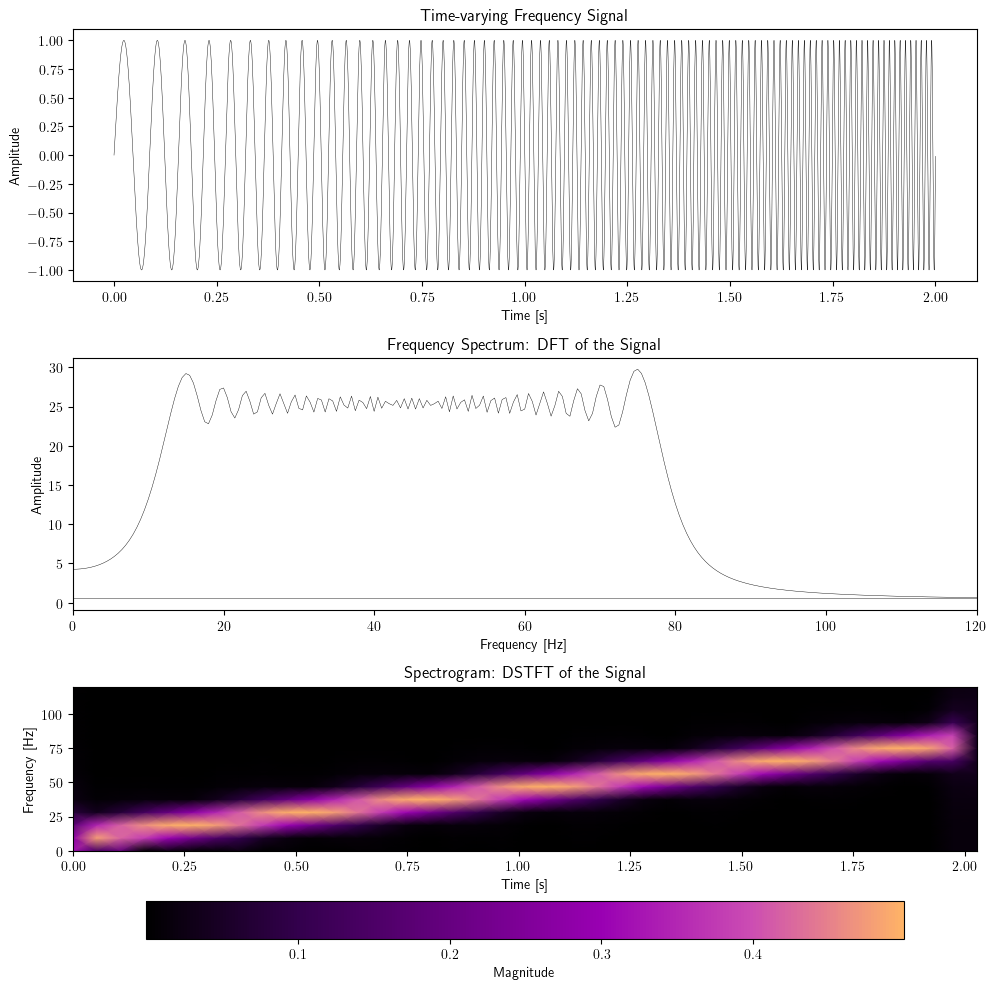

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import stft
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams['text.usetex'] = True

# Define a custom colormap
colors = [
    (0.0, 0.0, 0.0),    # Black
    (0.2, 0.0, 0.3),    # Dark Purple
    (0.4, 0.0, 0.5),    # Purple
    (0.6, 0.0, 0.7),    # Bright Purple
    (0.8, 0.3, 0.7),    # Light Purple
    (1.0, 0.7, 0.4)     # Yellow/Orange
]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# ------------------------------
# (1) 첫 번째 플롯을 위한 신호 생성 (fs = 50000)
# ------------------------------
fs_high = 50000  # 높은 샘플링 주파수
t_high = np.linspace(0, 2, 2 * fs_high, endpoint=False)  # 더 높은 해상도
f0, f1 = 10, 80  # 주파수 범위

# Time-varying frequency 신호 생성 (fs=50000)
signal_high = np.sin(2 * np.pi * (f0 + (f1 - f0)/2 * t_high/2) * t_high)

# ------------------------------
# (2) DFT, STFT 분석을 위한 신호 (fs = 100)
# ------------------------------
fs = 300  # 낮은 샘플링 주파수
t = np.linspace(0, 2, 2 * fs, endpoint=False)

# Time-varying frequency 신호 생성 (fs=100)
signal = np.sin(2 * np.pi * (f0 + (f1 - f0)/2 * t/2) * t)

# 푸리에 변환 수행
yf = fft(signal)
xf = fftfreq(len(t), 1 / fs)

# STFT 수행
f, t_stft, Zxx = stft(signal, fs, nperseg=32)  # fs=100에 맞게 작은 윈도우 사용

# ------------------------------
# (3) 그림 생성
# ------------------------------
fig, axes = plt.subplots(3, 1, figsize=(10, 10), tight_layout=True)

# (3-1) 첫 번째 플롯 (fs = 50000)
axes[0].plot(t_high, signal_high, color='k', linewidth=0.3)
axes[0].set_title(r"Time-varying Frequency Signal")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Amplitude")

# (3-2) 푸리에 변환 결과 (fs = 100)
axes[1].plot(xf, np.abs(yf), color='k', linewidth=0.3)
axes[1].set_title("Frequency Spectrum: DFT of the Signal")
axes[1].set_xlabel("Frequency [Hz]")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlim(0, 120)  # Nyquist 주파수(f_s/2 = 50)에 맞게 조정

# (3-3) STFT 결과 (fs = 100)
im = axes[2].pcolormesh(t_stft, f, np.abs(Zxx), shading='gouraud', cmap=cmap)
axes[2].set_title("Spectrogram: DSTFT of the Signal")
axes[2].set_xlabel("Time [s]")
axes[2].set_ylabel("Frequency [Hz]")
axes[2].set_ylim(0, 120)  # Nyquist 주파수 고려

# Color bar below the STFT plot
cbar = fig.colorbar(im, ax=axes[2], orientation='horizontal', pad=0.2)
cbar.set_label('Magnitude')

# 그림 저장
plt.tight_layout()
plt.savefig("./results/STFT_chirp.pdf",dpi=300)
plt.show()